# GRIP - The Spark Foundation

## Data Science and Business Analytics Intern

## Author - Satsandhischha 

## Task 1 : Prediction Using Supervised ML

### Predict the percentage of an student based on the no. of study hours. 

#### IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### IMPORTING THE DATASET INTO THE PANDAS DATAFRAME 

In [3]:
stuper = pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data Imported successfully')

Data Imported successfully


#### To show no of columns and rows present in the dataset

In [4]:
stuper.shape

(25, 2)

The above output shows that the dataset has 25 rows and only two columns

#### This command gives the first five rows of the dataset. To see what the dataset actually looks like.

In [5]:
stuper.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### To show the statistical details of the dataset.

In [6]:
stuper.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the dataset on a 2-D frame

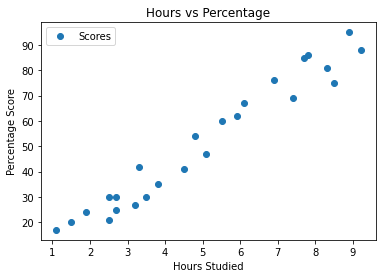

In [7]:
stuper.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph we can clearly see that there is a linear relation between the hours studied by the student and the percentage scored.

#### DIVIDING THE DATA INTO ATTRIBUTES AND LABELS

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset  attribute set will consist of the "Hours" column, and the label will be the "Score" column.

In [8]:
hours = stuper.iloc[:, :-1].values
score = stuper.iloc[:, 1].values

#### DIVIDING THE DATASET INTO TRAINING SET AND TEST SET

We are using scikit learn library to split the data into training and test set. The following command is splitting 80% of data into training set and 20% of data into test set.

In [9]:
from sklearn.model_selection import train_test_split
hours_train, hours_test, score_train, score_test = train_test_split(hours, score, test_size=0.2, random_state=0)

#### TRAINING THE ALGORITHM

We are using the LinearRegression class of Scikit learn library to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(hours_train, score_train)

LinearRegression()

#### The value of intercept and slope calculated by linear regression

In [11]:
print(regressor.intercept_)

2.018160041434683


In [12]:
print(regressor.coef_)

[9.91065648]


#### PLOTTING THE REGRESSION LINE

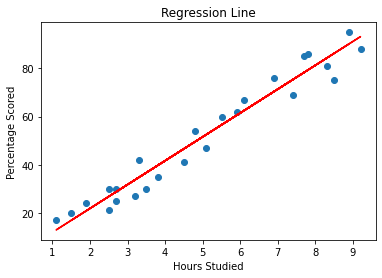

In [13]:
line_plot = regressor.coef_ * hours + regressor.intercept_
plt.scatter(hours , score)
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.plot(hours, line_plot, c='red')
plt.show()

#### MAKING THE PREDICTIONS

In [14]:
score_pred = regressor.predict(hours_test)

#### COMPARING BETWEEN ACTUAL AND PREDICTED

In [15]:
df = pd.DataFrame({'Actual': score_test, 'Predicted': score_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### PLOTTING THE ACTUAL V/S PREDICTED SCORE

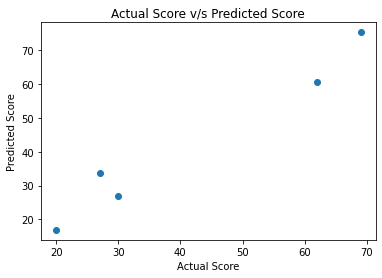

In [16]:
plt.scatter(score_test , score_pred)
plt.title('Actual Score v/s Predicted Score')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

#### PREDICTING THE SCORE OF THE STUDENT 

In [17]:
hrs = np.array(9.25).reshape(1,1)
predict_score = regressor.predict(hrs)
print('No of Hours = {}'.format(hrs))
print('Predicted Score = {}'.format(predict_score))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


#### EVALUATING OUR MODEL

This is to compare how well the model is working in the given dataset. As this is a regression algorithm we need to calculate MEAN ABSOLUTE ERROR , MEAN SQUARED ERROR , ROOT MEAN SQUARED ERROR. We are using the scikit learn library to calculate these errors.

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(score_test, score_pred))
print('Mean Squared Error:', metrics.mean_squared_error(score_test, score_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(score_test, score_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### THANK YOU